
### Google Data Analytics Capstone: Cyclistic Case study <br>
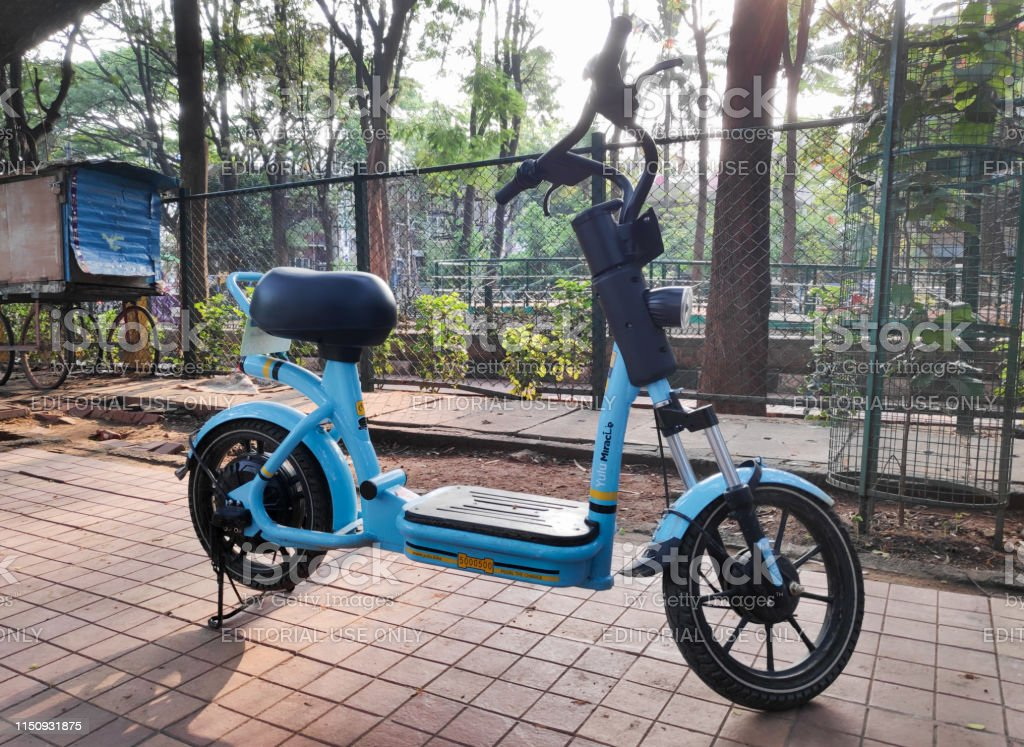


**Introduction:**

Welcome to the Cyclistic bike-share analysis case study!
This case study represents course 8 “Capstone project” of the Google Data Analytics Professional Certificate on Coursera

**The Scenario:**

Cyclistic is a fictional bike-share company in Chicago. The director of marketing believes the company’s future success depends on maximising the number of annual memberships. Therefore, the data analytics team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, the team will design a new marketing strategy to convert casual riders into annual members.

**About the company:**

In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. Cyclistic has flexible pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members.

Moreno, the director of marketing, has set a clear goal: Design marketing strategies aimed at converting casual riders into annual members.

There are three questions that will guide the future marketing program:
1. How do annual members and casual riders use Cyclistic bikes differently?
2. Why would casual riders buy Cyclistic annual memberships?
3. How can Cyclistic use digital media to influence casual riders to become members?

Moreno has assigned me the first question to answer: How do annual members and casual riders use Cyclistic bikes differently?

The business task:
Analyse the Cyclistic data set for the year 2021 to understand how annual members and casual riders use Cyclistic bikes differently.
**bold text**
**Stakeholders:**

Lily Moreno: The director of marketing. Moreno is responsible for the development of campaigns and initiatives to promote the bike-share program.
Cyclistic marketing analytics team: A team of data analysts who are responsible for collecting, analysing, and reporting data that helps guide Cyclistic marketing strategy.
Cyclistic executive team: The executive team will decide whether to approve the recommended marketing program.
Deliverables:

A description of all data sources used
Documentation of any cleaning or manipulation of data
A summary of the analysis
Supporting visualisations and key findings
Top three to four recommendations based on the analysis
Timeline:


1- A description of all data sources used:
The data-set which will be used for the analysis has been provided by Cyclistic management. It consists of 12 CSV files, one file for each month of the year 2021.
*This is public data that has been made available by Motivate International Inc. under this [licence](https://ride.divvybikes.com/data-license-agreement)

**Data collection** <br>
I combined the data for all 12 months and stored it in the file data.csv, post that I have loaded my dataset and imported the necessary libraries.


In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [2]:
#importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_filename = '/gdrive/MyDrive/data_2021.csv'
df = pd.read_csv(data_filename)
df.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.90,-87.70,casual


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5595063 entries, 0 to 5595062
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 554.9+ MB


Our dataset has 13 columns and I think I will keep all the columns and nalayse them one by one but before getting into that lets clean up our data a bit.

We will start the cleaning process by checking if the data has null values












In [5]:
#checking how much of the dataset contains null values
round(df.isnull().sum().sort_values(ascending=False)/len(df)*100,2)

end_station_name      13.21
end_station_id        13.21
start_station_name    12.35
start_station_id      12.35
end_lat                0.09
end_lng                0.09
ride_id                0.00
rideable_type          0.00
started_at             0.00
ended_at               0.00
start_lat              0.00
start_lng              0.00
member_casual          0.00
dtype: float64

In [6]:
df.dropna(inplace= True)

13% percent of the dataset has null values, and it is below the maximum percentage of 25%, so I dropped the columns

In [7]:
df.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

Now that the data has no null values, the next thing I want to do is eliminate those rows where the started_at > ended_at. So for this we do the following 3 things
1. Convert the columns started_at and ended_at to datetime format (currently its datatype is set to object)
2. Next we will add a column called ride_length and ride_length = ended_at- started_at
3. If ride_length < 0 then that entry will be considered erronous and we will drop that row from the dataset


In [8]:
#converting the columns started_at and ended_at to datetime format
df["started_at"] = pd.to_datetime(df["started_at"])
df["ended_at"] = pd.to_datetime(df["ended_at"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4588302 entries, 9 to 5595062
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 490.1+ MB


In [9]:
df["ride_length"] = (df["ended_at"] - df["started_at"])/pd.Timedelta(minutes=1)
df.head(2)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length
9,B9F73448DFBE0D45,classic_bike,2021-01-24 19:15:38,2021-01-24 19:22:51,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900363,-87.696704,41.899181,-87.67220,member,7.216667
10,457C7F4B5D3DA135,electric_bike,2021-01-23 12:57:38,2021-01-23 13:02:10,California Ave & Cortez St,17660,California Ave & North Ave,13258,41.900406,-87.696733,41.910435,-87.69689,member,4.533333


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4588302 entries, 9 to 5595062
Data columns (total 14 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  ride_length         float64       
dtypes: datetime64[ns](2), float64(5), object(7)
memory usage: 525.1+ MB


In [11]:
# filtered the negative values
negative_duration = df['ride_length'] < 0.0
# showing the number of negative time duration
df[negative_duration].count()

ride_id               116
rideable_type         116
started_at            116
ended_at              116
start_station_name    116
start_station_id      116
end_station_name      116
end_station_id        116
start_lat             116
start_lng             116
end_lat               116
end_lng               116
member_casual         116
ride_length           116
dtype: int64

There are 116 values for which the ride length is less than 0 so removing those rows.

In [12]:
# removing the negative duration
df.drop(df[negative_duration].index, inplace=True)

In [13]:
df.shape

(4588186, 14)

Now that our data is mostly clean I want to add 2 new columns , day_name and month. We will create these two columns by extracting the day of the week and month from the column "started_at" by using pd.DateTime

In [14]:
# finding the weekday of the date 
df['day_name'] = df['started_at'].dt.day_name()
df['day_name'].unique()

array(['Sunday', 'Saturday', 'Friday', 'Tuesday', 'Wednesday', 'Monday',
       'Thursday'], dtype=object)

In [15]:
# changing day_name to  categorical dtype
df['day_name']= df.day_name.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4588186 entries, 9 to 5595062
Data columns (total 15 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  ride_length         float64       
 14  day_name            category      
dtypes: category(1), datetime64[ns](2), float64(5), object(7)
memory usage: 529.5+ MB


In [16]:
df['month'] = pd.DatetimeIndex(df['started_at']).month

In [17]:
# calculate the no. of rides by members in a week
count_members = df[df['member_casual'] == 'member'].groupby('day_name')['ride_id'].count()
count_members

day_name
Friday       365782
Monday       346481
Saturday     357078
Sunday       311220
Thursday     373471
Tuesday      388131
Wednesday    397688
Name: ride_id, dtype: int64

In [18]:
# calculate the no. of rides by casual riders in a week
count_casual = df[df['member_casual'] == 'casual'].groupby('day_name')['ride_id'].count()
count_casual

day_name
Friday       290040
Monday       228934
Saturday     468325
Sunday       403762
Thursday     224207
Tuesday      214935
Wednesday    218132
Name: ride_id, dtype: int64

We see that annual members use the cycles more during the weekdays, with the usage being highest on **Friday**, whereas the casual riders use it more frequently on **weekends**. Taking an educated guess, I believe our annual members are those who use the cycle for travelling to their work and our casual riders are those who use the bike for leisure purpose like biking around town, sightseeing etc. I will further confirm this hypothesis by checking the distribution of usage by on the basis of hour of the day.

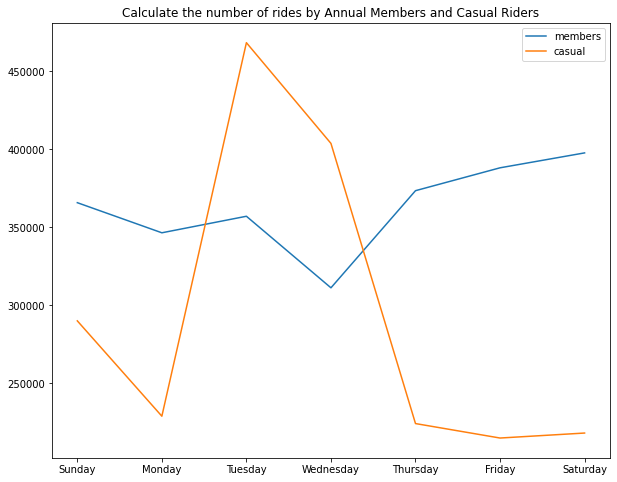

In [19]:
# plot the graph for number of rides by casual riders and annual members 
plt.figure(figsize = (10,8))
plt.plot(count_members.index, count_members.values)
plt.plot(count_casual.index, count_casual.values)
plt.title('Calculate the number of rides by Annual Members and Casual Riders')
plt.legend(['members', 'casual'])
labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.xticks(count_casual.index, labels)
plt.show()


A visualization of the number of rides by Annual Members and Casual Riders. From this visualization, we can see that there is a spike in rides by casual riders and a sharp drop in rides by members during the midweek, also rides by members rises steadily for members during the weekends and also a heavy drop in rides by casual riders during that same period.

We repeat the same process and check out the distribution pattern on a month wise basis

In [20]:
# calculate the no. of rides by members on a monthly basis
count_members_monthly = df[df['member_casual'] == 'member'].groupby('month')['ride_id'].count()
count_members_monthly

month
1      68819
2      34383
3     130048
4     177783
5     234164
6     304585
7     322902
8     332916
9     328192
10    288855
11    185909
12    131295
Name: ride_id, dtype: int64

In [21]:
# calculate the no. of rides by casual riders on a monthly basis
count_casual_monthly = df[df['member_casual'] == 'casual'].groupby('month')['ride_id'].count()
count_casual_monthly

month
1      14690
2       8613
3      75641
4     120420
5     216829
6     304189
7     369407
8     341469
9     292926
10    189117
11     69958
12     45076
Name: ride_id, dtype: int64

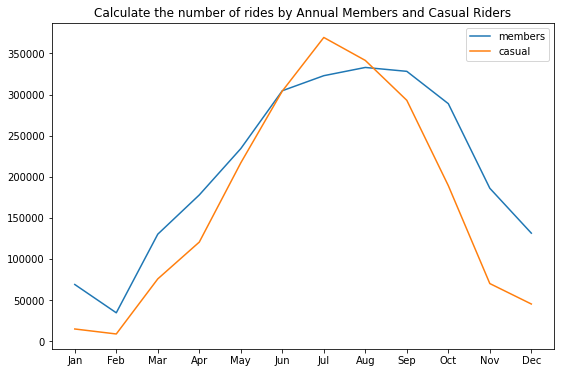

In [22]:
# plot the graph for number of rides by casual riders and annual members 
plt.figure(figsize = (9,6))
plt.plot(count_members_monthly.index, count_members_monthly.values)
plt.plot(count_casual_monthly.index, count_casual_monthly.values)
plt.title('Calculate the number of rides by Annual Members and Casual Riders')
plt.legend(['members', 'casual'])
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug','Sep','Oct','Nov','Dec']
plt.xticks(count_casual_monthly.index, labels)
plt.show()

From the visulaization above its evident that people use the bikes more frequently from May to September. July has the highest number of casual riders using the bike services. This monthly pattern can also be explained by 2 predominant reasons:

1. From the start and end latititude and longitude I know that the data collected mostly refers to the user behavior of the Chicago area. Chicago has a warm climate from May to September while it has freezing temperatures and snowfall from December - February. So naturally people choose to use the bikes during the summer months.
2. Secondly, December and January are festive months and businesses and offices shutdown for a couple of weeks during the holiday season and since a lot of our annual members use their cycles to commute to work , its understandable that the bike usage dips during those months.
 

In order to confirm my hypothesis that most of our annual members use the bikes to travel to work , I have used seaborn to draw a histplot to understand the hourly distribution  for both types of riders.

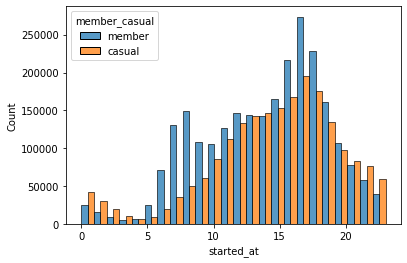

In [23]:
sns.histplot(data=df, x=df["started_at"].dt.hour,bins = 24,hue="member_casual", multiple="dodge")

From the above histplot we observe 2 things:
1. The member category has twin peaks - one at 8 am and the other at 5pm. This clearly proves that members use it for work purposes
2. The casual members mainly use the bike between 4pm-6pm.


I have also tried to further understand the riding behavior by analyzing the ride length for both category types.

In [24]:
# calculate the average ride length for casual_riders in a week
user_avg_casual = df[df['member_casual'] == 'casual'].groupby('day_name')['ride_length'].mean(numeric_only=False)
# calculate the average ride length for members in a week
user_avg_members = df[df['member_casual'] == 'member'].groupby('day_name')['ride_length'].mean(numeric_only=False)

/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_base.py:348: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


<function matplotlib.pyplot.show(*args, **kw)>

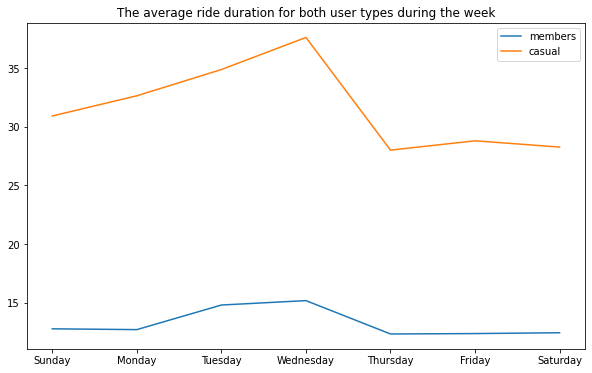

In [25]:
# plot the average ride_length for different users during the week
plt.figure(figsize = (10,6))
plt.plot(user_avg_members)
plt.plot(user_avg_casual)
plt.title('The average ride duration for both user types during the week')
plt.legend(['members', 'casual'])
labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.xticks(user_avg_members.index, labels)
plt.show

Annual riders use the bikes for a much shorter duration than casual riders. Since most of our annual riders use the bikes to ride to work hence the ride_lengths are comparitively smaller. Also we see that since the maximum ride length is approximately 17 mins for annual riders so that translates to 10-15 miles on average.

In [26]:
#To check the amount of users for a particular ride_type
ride_type = df.groupby('member_casual')['rideable_type'].value_counts()
ride_type
# # to segregate the number of users into members and casual riders based on ride type
list_member = []
list_x = []
list_y = list(ride_type.values)
for i, j in ride_type.index:
    list_x.append(j)
    list_member.append(str(i))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Member and Casual riders over the months based on ride_type')

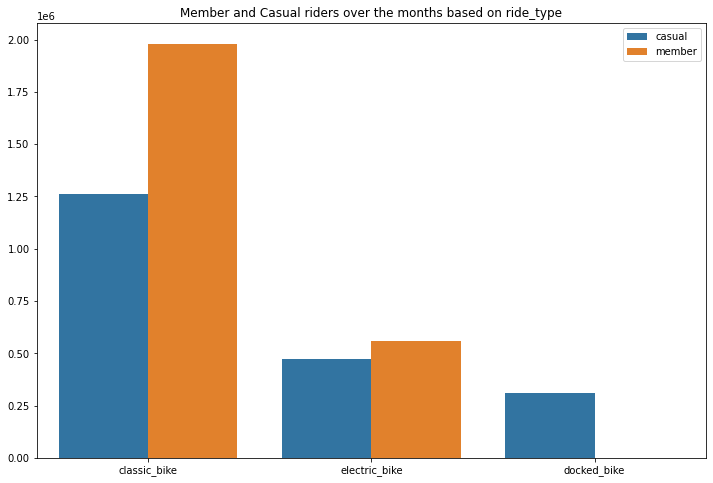

In [27]:
# to plot the number of users into members and casual riders based on rider type
plt.figure(figsize=(12,8))
sns.barplot(list_x, list_y, hue=list_member)
plt.title('Member and Casual riders over the months based on ride_type')

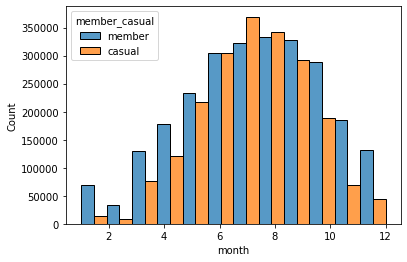

In [28]:
sns.histplot(data=df, x=df["month"],bins = 12,hue="member_casual", multiple="dodge")

This calculates the amount of users per month in each category, and the result shows that subscribed annual members make use of cyclistic bikes more tham casual riders except during the months of July and August when there is a surge in casual riders.

I wanted to perform a heat map analysis on the start station for both categories of riders to understand which stations experience the highest number of pickup and drop-offs and consequently which stations experience a lower footfall. For this purpose I have used the Folium library of Python.

In [29]:
df_casual = df[df["member_casual"] == "casual"]
df_member = df[df["member_casual"] == "member"]

In [38]:
import folium
from IPython.core.display import display, HTML
def folium_deepnote_show(m):
    data = m.get_root().render()
    data_fixed_height = data.replace('width: 100%;height: 100%', 'width: 100%').replace('height: 100.0%;', 'height: 609px;', 1)
    display(HTML(data_fixed_height))

In [39]:
import folium
from folium.plugins import HeatMap
sample_df = df_casual.sample(int(0.001 * len(df_casual)))
lat_lon_pairs = list(zip(list(sample_df["start_lat"]), list(sample_df["start_lng"])))
map = folium.Map()
y = HeatMap(lat_lon_pairs).add_to(map)
folium_deepnote_show(y)

In [37]:
sample_df = df_member.sample(int(0.001 * len(df_member)))
lat_lon_pairs = list(zip(list(sample_df["start_lat"]), list(sample_df["start_lng"])))
map = folium.Map()
x = HeatMap(lat_lon_pairs).add_to(map)


I wanted to know which stations were most used (top three) as a start_station and also as an end_station for both casual and member riders.

In [32]:
((df_member["start_station_name"].value_counts(dropna=False))/len(df_member)*100).head(5)

Clark St & Elm St           0.941000
Wells St & Concord Ln       0.896155
Kingsbury St & Kinzie St    0.892572
Wells St & Elm St           0.797094
Dearborn St & Erie St       0.734610
Name: start_station_name, dtype: float64

In [33]:
((df_member["end_station_name"].value_counts(dropna=False))/len(df_member)*100).head(5)

Clark St & Elm St           0.943796
Wells St & Concord Ln       0.921629
Kingsbury St & Kinzie St    0.899856
Wells St & Elm St           0.818906
Dearborn St & Erie St       0.760556
Name: end_station_name, dtype: float64

In [34]:
((df_casual["start_station_name"].value_counts(dropna=False))/len(df_member)*100).head(5)

Streeter Dr & Grand Ave    2.537511
Millennium Park            1.267200
Michigan Ave & Oak St      1.128452
Shedd Aquarium             0.887650
Theater on the Lake        0.811859
Name: start_station_name, dtype: float64

In [35]:
((df_casual["end_station_name"].value_counts(dropna=False))/len(df_member)*100).head(5)

Streeter Dr & Grand Ave    2.658699
Millennium Park            1.328582
Michigan Ave & Oak St      1.195503
Theater on the Lake        0.878280
Shedd Aquarium             0.833080
Name: end_station_name, dtype: float64

I am converting the cleaned data to csv file for future analysis purposes.


In [36]:
data_file = '/gdrive/MyDrive/Cyclistic_cleaned.csv'
df.to_csv(data_file)


Clark St & Elm St and Streeter Dr & Grand Aveare 2 stations with where annual and casual members respectively pick up and drop-off the maximum number of bikes. So we could increase the number of bikes present at these  




**Having analysed the data for 2021 these are my recommendations :**

1. Saturday and Sunday should be prioritised when it comes to scheduling ads for the digital online campaign.
2. Clark St & Elm St   and Wells St & Concord Ln    and Kingsbury St & Kinzie St are the 3 stations which experience the maximum footfall by annual members, so we could increase the number of bikes available at these stations. Similarly we need to increase the number of bikes at Streeter Dr & Grand Ave and Millennium Park and Michigan Ave & Oak St in case of casual members. We could also use these stations for advertisements and banners which can act as a catalyst for conversion of casual to annual members.
3. May - September are the months when people use these bikes heavily hence marketing should be targeted in these months. Casual riders use the bike most frequently in July hence Cyclistic could run special discounts and offers during this month.
4. The digital and physical marketing of Cyclistic should be done more between 3-6 pm because most of our casual riders use the bike at that time of the day.
5. Out of the 3 categories , annual members do not use the docked bike at all. This could be a data issue as well but otherwise Cyclistic needs to conduct research as to why annual members do not prefer to use the docked bikes. If we are able to dtermine that then perhaps we can convert more casual docked bike riders to annual members.
